In [1]:
import numpy as np
import pandas as pd

Import Data:

In [3]:
training_set = pd.read_csv("Training Set.csv")
training_label = pd.read_csv("Training Set Labels.csv")

Have a quick look at the training data

In [4]:
training_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


Have a look at the data types of each column

In [5]:
training_set.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

<b> Have a look at the categories of each categorical data</b>

In [6]:
for col in list(training_set.columns.values):
    if training_set[col].dtypes == "object" and col != "date_recorded":
        print(col)
        print(training_set[col].unique())

funder
['Roman' 'Grumeti' 'Lottery Club' ..., 'Dina' 'Brown' 'Samlo']
installer
['Roman' 'GRUMETI' 'World vision' ..., 'Dina' 'brown' 'SELEPTA']
wpt_name
['none' 'Zahanati' 'Kwa Mahundi' ..., 'Kwa Yahona Kuvala' 'Mshoro'
 'Kwa Mzee Lugawa']
basin
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']
subvillage
['Mnyusi B' 'Nyamara' 'Majengo' ..., 'Itete B' 'Maore Kati' 'Kikatanyemba']
region
['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']
lga
['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe' 'Mkinga'
 'Shinyanga Rural' 'Kahama' 'Tabora Urban' 'Mkuranga' 'Namtumbo' 'Maswa'
 'Siha' 'Meatu' 'Sumbawanga Rural' 'Njombe' 'Ukerewe' 'Bariadi' 'Same'
 'Kigoma Rural' 'Moshi Rural' 'Lindi Rural' 'Rombo' 'Chamwino' 'Bagamoyo'
 'Mafia' 'Arusha Rural' 'Kyela' 'Ko

Merge training data with labels

In [18]:
train = pd.merge(training_set, training_label, how="left", on="id")
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Let's make some plots!

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

# Create a subset for plotting
sub_train = train.sample(frac=0.1, replace=False)

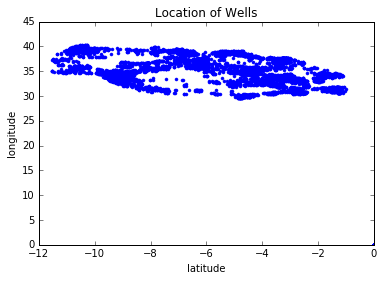

In [20]:
plt.plot(sub_train["latitude"], sub_train["longitude"], ".b")
plt.title("Location of Wells")
plt.xlabel("latitude")
plt.ylabel("longitude")

Remove obvious outliers

In [27]:
train = train[train["longitude"] > 10]

functional = train[train["status_group"] == "functional"]
non_functional = train[train["status_group"] == "non functional"]

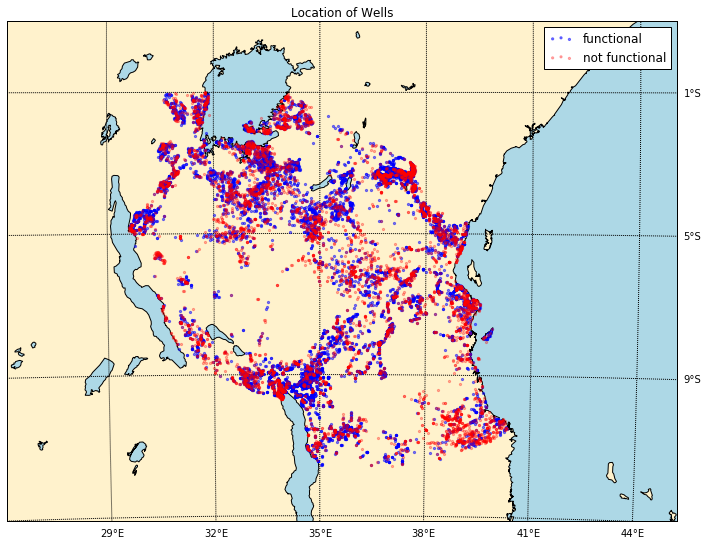

In [33]:
from mpl_toolkits.basemap import Basemap

# Create a subset for plotting
sub_func = functional.sample(frac=0.3, replace=False)
sub_non_func = non_functional.sample(frac=0.3, replace=False)

fig = plt.figure(figsize=(12,12))

map = Basemap(llcrnrlon=26,llcrnrlat=-13,urcrnrlon=45,urcrnrlat=1,
             resolution='i', projection='tmerc', lat_0 = -6.37, lon_0 = 34.89)

map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='#fff2cc',lake_color='lightblue')
map.drawcoastlines()

parallels = np.arange(-13, 1, 4)
map.drawparallels(parallels, labels=[False,True,True,False])
meridians = np.arange(26, 45, 3)
map.drawmeridians(meridians, labels=[True,False,False,True])

x1, y1 = map(sub_func["longitude"].values, sub_func["latitude"].values)
x2, y2 = map(sub_non_func["longitude"].values, sub_non_func["latitude"].values)

map.scatter(x1, y1, marker='.',color='blue', zorder=10, alpha=0.5, label="functional")
map.scatter(x2, y2, marker='.',color='red', zorder=10, alpha=0.3, label="not functional")

plt.title("Location of Wells")
plt.legend()
plt.show()

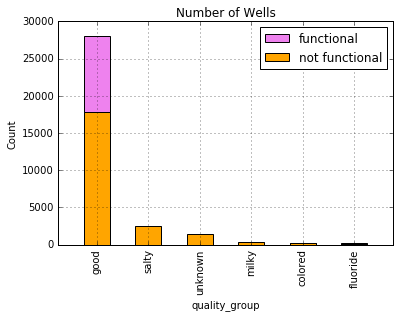

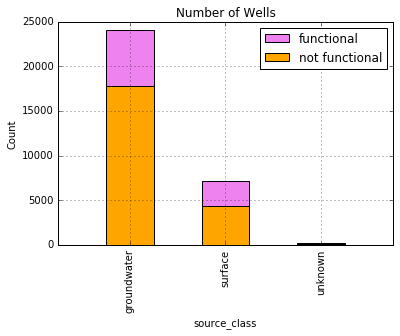

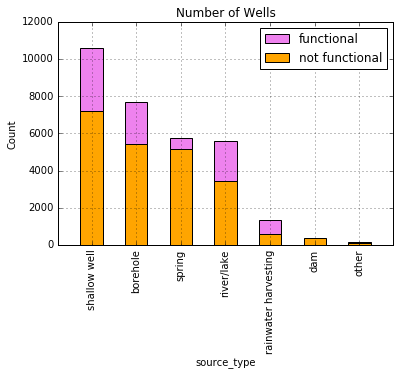

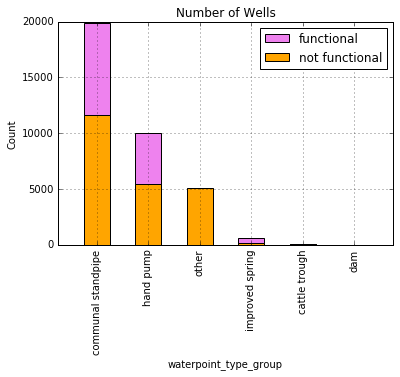

In [29]:
list_feature = ["quality_group", "source_class", "source_type", "waterpoint_type_group"]

for item in list_feature:
    group_f = functional.groupby([item]).size().sort_values(ascending=False)
    group_nf = non_functional.groupby([item]).size().sort_values(ascending=False)
    group = group_nf.index.tolist()
    ind = np.arange(len(group))

    width = 0.5

    plt.bar(ind, group_f, width, color="violet", label="functional")
    plt.bar(ind, group_nf, width, color="orange", label="not functional")

    plt.ylabel("Count")
    plt.xlabel(item)
    plt.xticks(ind + width/2., group)
    plt.xlim(-0.5, len(group))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.title("Number of Wells")
    plt.legend()
    plt.grid()
    plt.show()

For columns that contain continuous data, we need to perform standardization. The reason is that many learning algorithms (such as the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order.